<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/AxelDavid_1103210017_TK4504_Classification_KKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Axel David<br>
NIM  : 1103210017

In [36]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [38]:
url = "/content/iris.data.csv"
iris_df = pd.read_csv(url, header=None)
iris_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
iris_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(X_test)

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [52]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

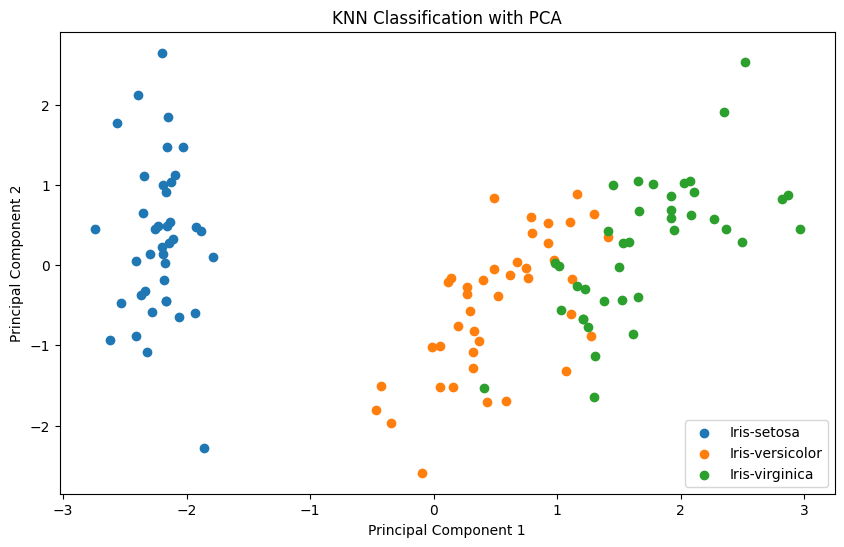

In [54]:
plt.figure(figsize=(10, 6))
for species in iris_df['species'].unique():
    plt.scatter(X_train_pca[y_train == species, 0], X_train_pca[y_train == species, 1], label=species)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Classification with PCA')
plt.legend()
plt.show()